Fill in any place that says `# YOUR CODE HERE` or YOUR ANSWER HERE, as well as your name and collaborators below.
Grading for pre-lecture assignments is all or nothing. Partial credit is available for in-class assignments and checkpoints, but **only when code is commented**.

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Learning Objectives

This lecture will show you how to:
1. Update the display in a notebook
2. Create animated plots using Matplotlib
3. Display a progress bar
4. Draw simple shapes with Matplotlib (which can also be animated)

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# for animations
from IPython import display # manipulate notebook output
from time import sleep # used to slow things down
from matplotlib.animation import FuncAnimation # animate by repeatedly calling a function

import grading_helper as _test

# Simple Animations With `IPython.display`

In [ ]:
%video UHR-zjD2LNU

Summary:
- Use `IPython.display.clear_output(wait=True)` in a loop to create simple animated output in a notebook.
- If desired, use `time.sleep` to slow the animation down.
- CAUTION: this type of animation only runs in a live notebook when the cell is run.

## Your Turn

Modify the code below so that instead of printing 1000 lines of output, it instead prints a single line of output that is continuously updated using `display.clear_output`. The unicorn should look like its moving.

In [ ]:
%%graded # 1 point

for i in range(1000):
    zoom = " " * (i%100) + "🦄" # unicode unicorn
    
    # YOUR CODE HERE
    
    print(zoom)

In [ ]:
%%tests

_test.code_contains("display.clear_output")
_test.printed("🦄\n") # 0th step
_test.printed("     🦄\n") # 5th step

# Animations With `matplotlib`

In [ ]:
%video GtZxk8Wa3Jw

Summary:
- Animation Recipe:
    1. Setup a `plt.figure` and one or more empty objects that will be animated. Store those objects in a variable.
    2. Write a function that changes those objects every `frame`
    3. Use `FuncAnimation` to create an animation object using your figure and the function from the previous part.
    4. Set total number of `frames` and delay between frames `interval`
    5. Convert the animation to a video and display it in the notebook.


- Typical "boilerplate" code:
    ```
    # setup
    fig = plt.figure()
    line, = plt.plot([]) # or similar
    # set limits, etc.

    # called once per frame
    def animate(frame):
        line.set_data(...)

    # create the animation
    anim = FuncAnimation(fig, animate, frames=100, interval=20)
    
    # convert it to an HTML video
    video = anim.to_html5_video()
    
    # tell the notebook that you want to display raw HTML
    html = display.HTML(video)
    
    # display the animation
    display.display(html)
    
    # don't draw an extra figure the next time you call plt.show()
    plt.close()
```

## Your Turn

Modify the example so that the point takes a different path.

In [ ]:
%%graded # 2 points

fig = plt.figure()
lines = plt.plot([], "o")
line = lines[0] # lines is a tuple, since plots can have more than one line
plt.axis("scaled")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

def animate(frame):
    # you write the function body
    # YOUR CODE HERE

anim = FuncAnimation(fig, animate, frames=100, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
%%tests

_test.code_contains("line.set_data")
_test.animation_shown()

# Redrawing the Entire Figure

In [ ]:
%video 9SdWJe9A30A

Summary:
- Worst case, you can always redraw your figure each frame by calling `fig.clear()` in the animation function.
- Keep in mind that this will be slow.

# Adding a Simple Progress Bar

In [ ]:
%video LMslz-ti3ME

Summary:
- Create a progress bar using `display.ProgressBar(max_value)`
- Display it by calling its `.display()` method.
- Update the progress by setting `.progress = current_progress`
- Optionally, remove it by calling `display.clear_output` (but be careful with the timing).

## Your Turn

Create a progress bar with a max value of 100, set its progress to 50, and display it. (You don't need to make an animation. Just draw the progress bar.)

In [ ]:
%%graded # 1 point

# YOUR CODE HERE

In [ ]:
%%tests

_test.code_contains("ProgressBar", "progress", "display", "100", "50")

# Drawing Shapes With `matplotlib`

In [ ]:
%video rVqMwXUJWGQ

Summary:
- Matplotlib offers a few graphical primitives. Examples: `plt.Circle`, `plt.Rectangle`, `plt.Line2D`
- To make these primitives appear, get the current axes with `ax = plt.gca()` and then use `ax.add_patch` (for most shapes) or `ax.add_line` (for Line2D).

## Your Turn

Use `plt.Circle` and `plt.rectangle` to try to reproduce the following image:
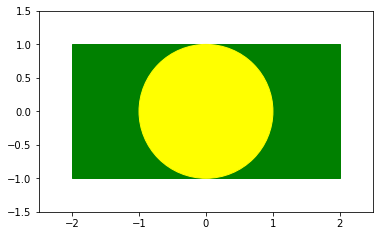

In [ ]:
%%graded # 1 point

# YOUR CODE HERE

In [ ]:
%%tests

_test.code_contains("Circle", "Rectangle", "color", "add_patch")
_test.plot_shown()

# Additional Resources

- More examples: https://matplotlib.org/examples/animation/index.html

    Some of these use "blitting" (selective redrawing) by setting `blit=True` in `FuncAnimation`. In my testing, it's not worth the added complexity. I haven't seen much of a difference in speed.